Cell 1: Activation cell

In [1]:
import sys
from pathlib import Path
import os

# --- Resolve project root safely from a notebook ---
PROJECT_ROOT = Path(os.getcwd()).resolve()
if PROJECT_ROOT.name == "notebooks":
    PROJECT_ROOT = PROJECT_ROOT.parent

# Add project root to Python path
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

print("Project root:", PROJECT_ROOT)

# --- Imports from src ---
from src.train import train_model

# --- Data directory ---
DATA_DIR = PROJECT_ROOT / "data" / "raw" / "EuroSAT_RGB"
print("Data dir:", DATA_DIR)

# --- Train model ---
model, class_names = train_model(
    data_dir=DATA_DIR,
    epochs=5
)

Project root: C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model
Data dir: C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\data\raw\EuroSAT_RGB
Using device: cpu


Epoch 1/5: 100%|██████████| 296/296 [00:46<00:00,  6.33it/s]


Epoch 1 | Train Loss: 0.9445 | Val Acc: 0.7822
Saved BEST model so far to C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\models\simple_cnn.pth (val_acc=0.7822)


Epoch 2/5: 100%|██████████| 296/296 [00:52<00:00,  5.69it/s]


Epoch 2 | Train Loss: 0.5654 | Val Acc: 0.8044
Saved BEST model so far to C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\models\simple_cnn.pth (val_acc=0.8044)


Epoch 3/5: 100%|██████████| 296/296 [01:12<00:00,  4.06it/s]


Epoch 3 | Train Loss: 0.4166 | Val Acc: 0.8146
Saved BEST model so far to C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\models\simple_cnn.pth (val_acc=0.8146)


Epoch 4/5: 100%|██████████| 296/296 [01:49<00:00,  2.69it/s]


Epoch 4 | Train Loss: 0.3299 | Val Acc: 0.8454
Saved BEST model so far to C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\models\simple_cnn.pth (val_acc=0.8454)


Epoch 5/5: 100%|██████████| 296/296 [01:42<00:00,  2.88it/s]


Epoch 5 | Train Loss: 0.2357 | Val Acc: 0.8422
Done. Best Val Acc: 0.8454


Cell 2: Load saved model and run test evaluation

In [2]:
import torch
from pathlib import Path

from src.dataset import load_eurosat_dataset
from src.models import build_model
from src.eval import evaluate_model

device = "cuda" if torch.cuda.is_available() else "cpu"

# Reload loaders (same splits as before if seed is same)
train_loader, val_loader, test_loader, class_names = load_eurosat_dataset(
    data_dir=DATA_DIR,
    img_size=64,
    batch_size=64,
    seed=42
)

# Load model weights
model = build_model(num_classes=len(class_names)).to(device)
model.load_state_dict(torch.load(Path("../models/simple_cnn.pth"), map_location=device))
model.eval()

test_acc, cm, report = evaluate_model(model, test_loader, class_names, device)

print("Test Accuracy:", round(test_acc, 4))
print(report)

Test Accuracy: 0.8375
                      precision    recall  f1-score   support

          AnnualCrop     0.9279    0.8178    0.8694       472
              Forest     0.8614    0.9706    0.9128       442
HerbaceousVegetation     0.7985    0.7096    0.7514       458
             Highway     0.6681    0.7724    0.7165       391
          Industrial     0.9065    0.9233    0.9148       378
             Pasture     0.7697    0.8495    0.8076       299
       PermanentCrop     0.8239    0.6544    0.7294       379
         Residential     0.8676    0.9756    0.9184       450
               River     0.8129    0.7413    0.7755       375
             SeaLake     0.9249    0.9409    0.9328       406

            accuracy                         0.8375      4050
           macro avg     0.8362    0.8355    0.8329      4050
        weighted avg     0.8399    0.8375    0.8357      4050



Cell 3: Confusion matrix

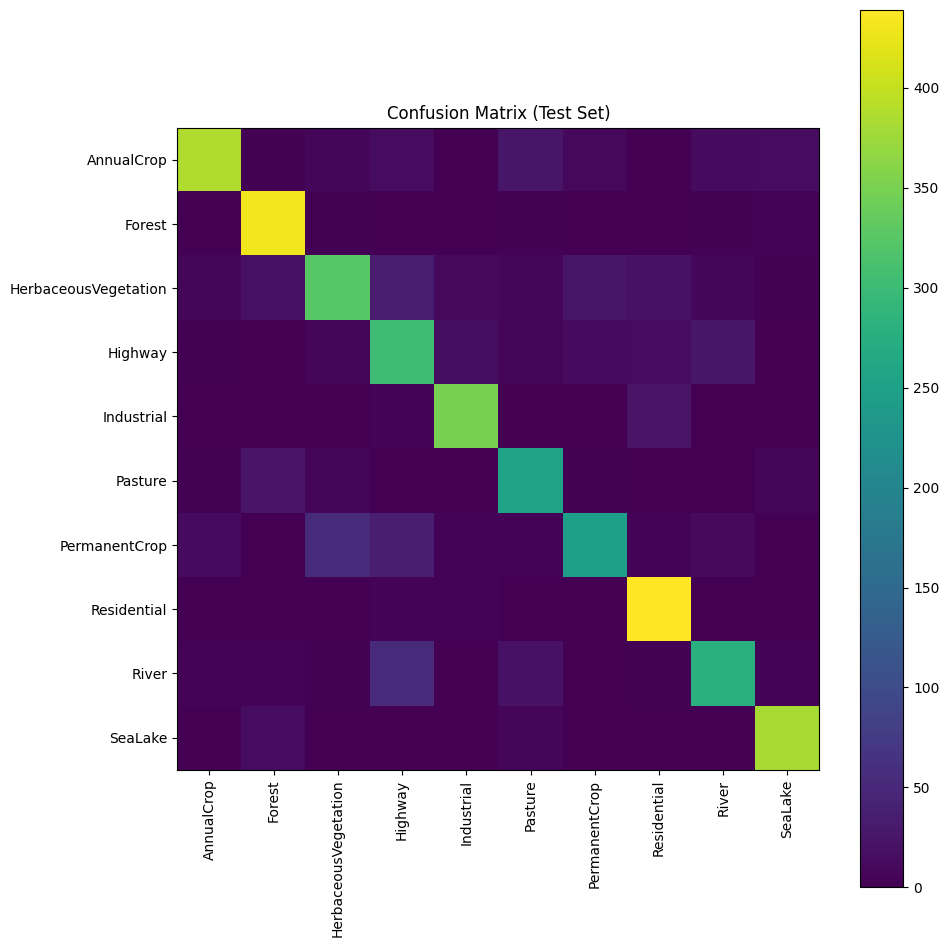

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
plt.imshow(cm)
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=90)
plt.yticks(ticks=np.arange(len(class_names)), labels=class_names)
plt.title("Confusion Matrix (Test Set)")
plt.colorbar()
plt.tight_layout()
plt.show()